# Near Miss Development: V3
- Addressing Scale of features + Uses DTW distance measure (Basic Implementation)

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import time

import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
import matplotlib.pyplot as plt

from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

PLACE_HOLDER = None

## Begin Near Miss Development Here:

#### Function IO

In [ ]:
def near_miss_v3(x, y, k, r=3):
    """
    Parameters:
    x : numpy array
        Long time series data
    y : numpy array
        Query sequence
    k : int
        Size of pieces
    r : int
        Size of neighborhood when expanding the path. A higher value will
        increase the accuracy of the calculation but also increase time
        and memory consumption. A radius equal to the size of x and y will
        yield an exact dynamic time warping calculation.
    Returns:
    dist : numpy array
        DTW-based distance profile with scale penalty
    """

# Development V3 Objective:
- Implement Fast Dynamic Time Warping (DTW) and a Scale Penalty to account for differences in scale

## Proposition:
- Create a scale penalty function that adds onto the distance measure based on the mean & std deviation

#### Near Miss Shape Algorithm:
- Reimplementation of MASS V3 utilizing DTW as the distance measure AND adjusting distance for scale

In [2]:
def near_miss_v3(x, y, r=3):
    """
    Parameters:
    x : numpy array
        Long time series data
    y : numpy array
        Query sequence
    k : int
        Size of pieces
    r : int
        Size of neighborhood when expanding the path. A higher value will
        increase the accuracy of the calculation but also increase time
        and memory consumption. A radius equal to the size of x and y will
        yield an exact dynamic time warping calculation.
    Returns:
    dist : numpy array
        DTW-based distance profile with scale penalty
    """
    
    n = len(x)
    m = len(y)
    expected_length = n - m + 1
    dist = []

    k = determine_k(n, m)

    # Loop through segments of the time series x
    for j in range(0, n - m + 1, k):  # Adjust step size based on query length and window
        segment = x[j:j + m]
        
        if len(segment) == m:  # Ensure segment matches query length
            # Use DTW to compute distance between the current segment and the query
            distance, _ = fastdtw(segment, y)
            distance += compute_scale_penalty(segment, y)
            dist.append(distance)

    # Ensure consistent length
    dist = np.array(dist)
    if len(dist) > expected_length:
        dist = dist[:expected_length]
    elif len(dist) < expected_length:
        dist = np.pad(dist, (0, expected_length - len(dist)), 'constant', constant_values=np.nan)

    return dist


### Scale Penalty Function

In [3]:
def compute_scale_penalty(subsequence, query_sequence):
    """
    Computes the scale penalty based on the difference in scale (mean and std deviation)
    between a subsequence and the query sequence.

    Parameters:
    ----------
    subsequence : numpy array
        A subsequence of the longer time series.
    query_sequence : numpy array
        The query time series.

    Returns:
    -------
    scale_penalty : float
        A penalty value based on the scale difference between the two sequences.
    """
    # Calculate the length of the subsequence
    len_subsequence = len(subsequence)

    # Calculate mean and standard deviation of both sequences
    mean_subsequence = np.mean(subsequence)
    mean_query = np.mean(query_sequence)
    # std_subsequence = np.std(subsequence)
    # std_query = np.std(query_sequence)
    
    # Compute penalty as the absolute difference in means and standard deviations
    mean_diff = abs(mean_subsequence - mean_query)
    # std_diff = abs(std_subsequence - std_query)
    
    scale_penalty = len_subsequence * mean_diff # Sequence length multiplied by mean difference
    
    return scale_penalty

### Function for determining the optimal value for k (number of pieces):

In [4]:
def determine_k(n, m):
    """
    Determines the optimal value of k for MASS V3.
    
    Parameters:
    n : Length of the time series (int) 
    m : Length of the query (int)

    Returns:
    k : Optimal segment size, preferably a power of two (int)
    """
    # Set k to be the next power of two greater than or equal to 4 times the query length
    k = 2 ** int(np.ceil(np.log2(max(4 * m, m))))
    # Ensure k is not greater than the length of the time series
    k = min(k, n)
    return k

## Test Implementation

In [5]:
# Load the query and trip data (1 query and 1 trip)
x = pd.read_csv(r'C:\Users\donav\OneDrive\Desktop\Gatech\Research\GRA Ford Research\Near Miss Algorithm Development\data\x_trip_5109.csv')
y = pd.read_csv(r'C:\Users\donav\OneDrive\Desktop\Gatech\Research\GRA Ford Research\Near Miss Algorithm Development\data\y_query_7.csv')


In [6]:
# Determine the optimal segment size
n = len(x)
m = len(y)
k = determine_k(n, m)

In [7]:
# The initial columns to compare in the time series data
columns = ['veh_long_vel_mps', 'veh_accel_mps2_analytical', 'veh_ltrl_vel_mps', 'veh_yaw_rate_radps', 'veh_jerk_mps3_analytical']

In [8]:
# Set the radius for the DTW calculation
r = 3

In [20]:
print("Test Description: This test is for Near Miss algorithm v3 implementation")

start_time = time.time()

combined_distance_profile = near_miss_v3(x[columns[0]].values, y[columns[0]].values, r)  # Initialize combined distance profile

# Loop through each column and compute the distance profile
for col in columns:
    if col == columns[0]:
        continue
    distance_profile = near_miss_v3(x[col].values, y[col].values, r)
    combined_distance_profile += distance_profile  # Sum the distance profiles

# Remove trailing NaN values from the combined distance profile
first_nan_index = np.where(np.isnan(combined_distance_profile))[0][0] if np.any(np.isnan(combined_distance_profile)) else len(combined_distance_profile)
combined_distance_profile = combined_distance_profile[:first_nan_index]

end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

Test Description: This test is for Near Miss algorithm v3 implementation
Time taken: 0.5176680088043213 seconds


In [21]:
# Print all the value of the combined distance profile
print(combined_distance_profile)

# Print the minimum distance and its index
min_distance = np.nanmin(combined_distance_profile)
print(f"Minimum distance: {min_distance}")

[ 296.979071  129.525488  112.514101  133.064381  231.111948  235.93363
  220.929477  202.550295  101.58581   119.229088  314.465609  308.68925
  322.866893  205.769401  564.10198   483.455883  449.653567  401.278775
 1042.134538 2347.159687  470.543553  620.462216  555.64072   511.607676
  498.194191  355.154342 1199.94089  1112.26755  1248.514932 1356.114667
 1335.469777 1607.763402 1665.215777 1416.563988 1351.786488 1275.48623
 1392.124773 1614.30688  1751.05285  1296.34635  1514.22794  1487.326721
 1786.03872   951.429826  389.440131  388.806419  323.866183  141.064656
  142.013294  238.364734  269.027343  165.98675  1208.789849 1849.630497
 1558.48212  2132.707918 2131.471332  493.714839  488.61284   751.00271
  651.972857  900.269937  885.255275 1335.87418  1309.183807 1525.078119
  478.058299  973.260421  731.197677  542.506546 1026.879905 1029.632924
 1683.985291 2069.14101  1904.74884  1899.58129  1869.474095 2074.642879
 1659.177034 1990.693383 1953.576883 1634.138988 2066.6

# Analysis
- What does this new distance profile look like?

In [22]:
# Plot Distance Profile Function using seaborn
def plot_distance_profile(distance_profile):
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=distance_profile)
    plt.title(f'Multivariate Distance Profile for Selected Trip', fontsize=16, fontweight='bold')
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('DTW Distance', fontsize=14)
    plt.grid(True)
    plt.xlim(left=0)  # Ensure x-axis starts at 0
    plt.ylim(bottom=0)  # Ensure y-axis starts at 0
    plt.show()

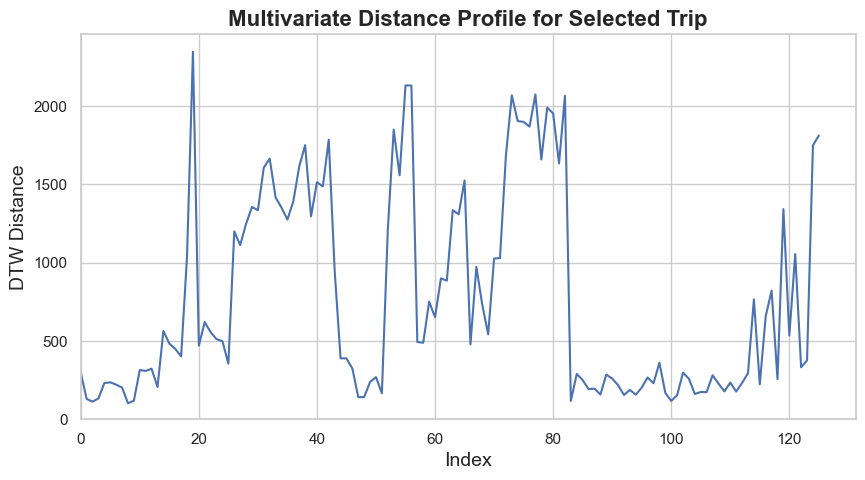

In [23]:
# Plot the combined distance profile
plot_distance_profile(combined_distance_profile)